In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
from numpy.linalg import norm 
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.measure import block_reduce
from sklearn.preprocessing import normalize
from numpy.random import randn, rand, permutation

import helperFunctions as hf

Img 1 Blocks:  2928
Img 2 Blocks:  2928
Img 3 Blocks:  3922


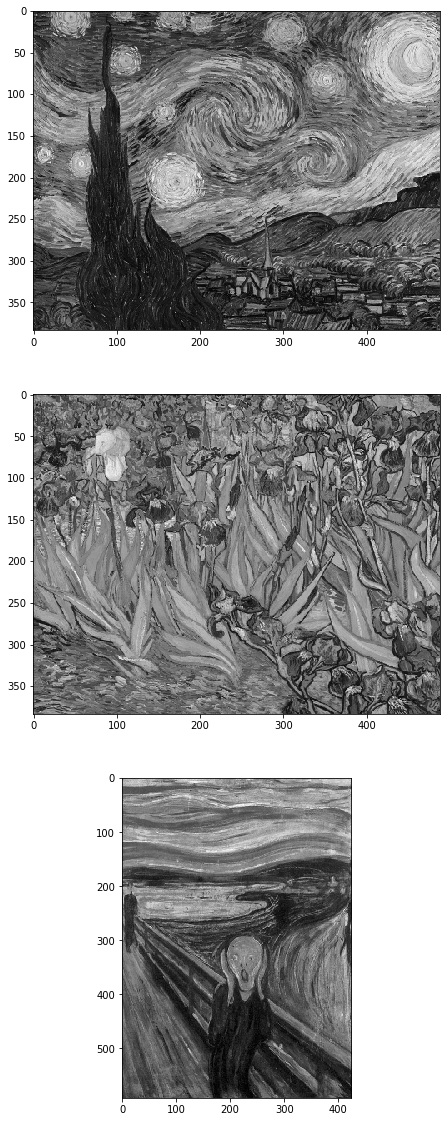

In [15]:
# Size for dictionary blocks
block = 8

# # %% Load data
downScale, trim = 2, 10
night = imread('Images/starryNight.jpg', as_gray=True)
night = block_reduce(night, block_size=(downScale, downScale))[trim:-trim, trim:-trim]
H, W  = night.shape
H = block * (H // block) 
W = block * (W // block)
night = night[:H, :W]

downScale, trim = 2, 15
irises = imread('Images/irises.jpg', as_gray=True)
irises = block_reduce(irises, block_size=(downScale, downScale))[trim:-trim, trim:-trim]
irises = irises[-H:, :W]

downScale, trim = 1, 20
scream = imread('Images/scream.jpg', as_gray=True)
scream = block_reduce(scream, block_size=(downScale, downScale))[:, trim:-trim]
H1, W1  = scream.shape
H1 = block * (H1 // block) 
W1 = block * (W1 // block)
scream = scream[:H1, :W1]

fig, axes = plt.subplots(3,1,figsize=(10,20))
plt.set_cmap('gray')
axes[0].imshow(night)
axes[1].imshow(irises)
axes[2].imshow(scream);

print('Img 1 Blocks: ',int((H/block)*(W/block)))
print('Img 2 Blocks: ',int((H/block)*(W/block)))
print('Img 3 Blocks: ',int((H1/block)*(W1/block)))

## Learn a dictionary _D_ from Starry Night, then use discitonary to reconstruct Irises and The Scream

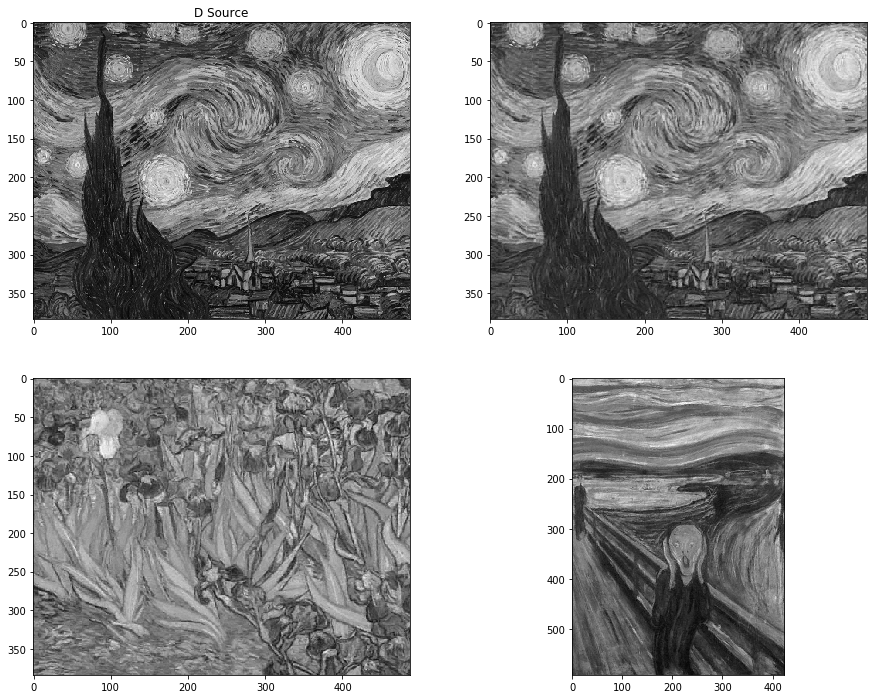

In [16]:
# Partition into pixel blocks
night_block = hf.ImgBlockPartition(night,block,block)
M, N, P     = night_block.shape
night_block = np.reshape(night_block,(M,N*P))

# Learn dictionary D from starry night
numAtoms, K = 120, 5
D, _ = hf.kSVD(night_block,numAtoms,K)

fig, axes = plt.subplots(2, 2, figsize=(15,12))
plt.set_cmap('gray')
axes[0][0].imshow(night)
axes[0][0].set_title('D Source')

# Try to reconstruct each painting using D
for ii, image in enumerate([night, irises, scream]):
    img_block = hf.ImgBlockPartition(image,block,block)
    M, N, P   = img_block.shape
    img_block = np.reshape(img_block,(M,N*P))
    
    Xh = hf.OMP(D, img_block, K)
    recovered     = D @ Xh
    reconstructed = hf.ImgBlockReconstruct(recovered,block,block,image.shape[0],image.shape[1])

    jj = ii+1
    axes[jj//2][jj%2].imshow(reconstructed)